In [1]:
%matplotlib notebook

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set_style("whitegrid")

import os
# os.environ['JCMPYTHON_CONFIG_FILE'] = '../local/config.cfg'
if 'JCMPYTHON_CONFIG_FILE' in os.environ:
    del os.environ['JCMPYTHON_CONFIG_FILE']

import sys
sys.path.append('..')
import jcmpython as jpy
jpy.import_jcmwave('/hmi/kme/programs/JCMsuite_3_0_14/')
import numpy as np
jpy.load_extension('antenna')

#project = jpy.JCMProject('antennaExample')

[INFO] init: Imported jcmwave from: /hmi/kme/programs/JCMsuite_3_0_14/
[INFO] init: Loaded extension: antenna


In [2]:
project = jpy.JCMProject('../projects/scattering/mie/mie2D_rot')

# New version

In [3]:
sim = jpy.Simulation(keys={}, project=project)

In [4]:
ffe = jpy.FarFieldEvaluation(simulation=sim)

In [5]:
ffe._generate_jcmp_files()

# Niko's original version

In [3]:
keys = {'constants':{},
        'parameters':{},
        'geometry':{}}

In [4]:
simuset = jpy.SimulationSet(project, keys)
simuset.make_simulation_schedule()

[INFO] core.SimulationSet: Using folder /hmi/kme/workspace/jcmpython/examples/160912 for data storage.
[INFO] core.SimulationSet: Performing a single simulation


In [5]:
own_antenna = jpy.antenna()

In [6]:
own_antenna.generatePostProcess(simuset.project.get_project_file_path())

In [17]:
os.path.split(simuset.project.get_project_file_path())

('/hmi/kme/workspace/jcmpython/examples/current_run', 'mie2D_rot.jcmpt')

In [19]:
simuset.project.project_file_name

'mie2D_rot.jcmpt'

In [7]:
simuset.solve_single_simulation(0,run_post_process_files=own_antenna.filePaths)

[WARNING] py.warnings: /hmi/kme/.local/lib/python2.7/site-packages/jcmpython/parallelization.py:246: RuntimeWarning: Ignoring deprecated argument "JCMKERNEL".
  **self.kwargs)



([{'computational_costs': {'CpuPerUnknown': array([ 0.00012908]),
    'CpuTime': array([ 1.]),
    'CpuTimeAssembling': array([ 0.239009]),
    'CpuTimeInnerNodeUpdate': array([ 0.06712]),
    'CpuTimeSolve': array([ 0.048091]),
    'FEDegree0_Percentage': array([ 0.]),
    'FEDegree10_Percentage': array([ 0.]),
    'FEDegree1_Percentage': array([ 0.]),
    'FEDegree2_Percentage': array([ 0.]),
    'FEDegree3_Percentage': array([ 0.]),
    'FEDegree4_Percentage': array([ 100.]),
    'FEDegree5_Percentage': array([ 0.]),
    'FEDegree6_Percentage': array([ 0.]),
    'FEDegree7_Percentage': array([ 0.]),
    'FEDegree8_Percentage': array([ 0.]),
    'FEDegree9_Percentage': array([ 0.]),
    'Level': array([0], dtype=int32),
    'SystemMemory_GB': array([ 0.01123619]),
    'TotalMemory_GB': array([ 0.35294724]),
    'TotalTime': array([1], dtype=int32),
    'TotalTimeAssembling': array([ 1.]),
    'TotalTimeInnerNodeUpdate': array([ 0.]),
    'TotalTimeSolve': array([ 0.]),
    'Unknowns'

In [8]:
simuset.simulations[0].process_results(processing_func=jpy.antenna.read_fullFarField, overwrite=True)

In [9]:
simuset.simulations[0]._results_dict

{'AccumulatedCPUTime': 1.172582,
 'AccumulatedTotalTime': 1.0,
 'CpuPerUnknown': 0.0001290822253775655,
 'CpuTime': 1.0,
 'CpuTimeAssembling': 0.239009,
 'CpuTimeInnerNodeUpdate': 0.067119999999999999,
 'CpuTimeSolve': 0.048091000000000002,
 'FEDegree0_Percentage': 0.0,
 'FEDegree10_Percentage': 0.0,
 'FEDegree1_Percentage': 0.0,
 'FEDegree2_Percentage': 0.0,
 'FEDegree3_Percentage': 0.0,
 'FEDegree4_Percentage': 100.0,
 'FEDegree5_Percentage': 0.0,
 'FEDegree6_Percentage': 0.0,
 'FEDegree7_Percentage': 0.0,
 'FEDegree8_Percentage': 0.0,
 'FEDegree9_Percentage': 0.0,
 'FF_down': array([[  3.77666699e-17 -2.24293268e-17j,
          -3.15544362e-30 +6.31088724e-30j,
           2.16386860e-14 -1.28510446e-14j],
        [  3.85197410e-15 -2.17913359e-15j,
          -1.42348159e-14 +8.04892989e-15j,
           2.09013656e-14 -1.24131558e-14j],
        [  1.42725826e-14 -8.07135922e-15j,
          -2.46554244e-14 +1.39411555e-14j,
           1.87396517e-14 -1.11293311e-14j],
        ..., 
  

In [10]:
own_antenna.full_directivity(simuset.simulations[0]._results_dict)

<IPython.core.display.Javascript object>


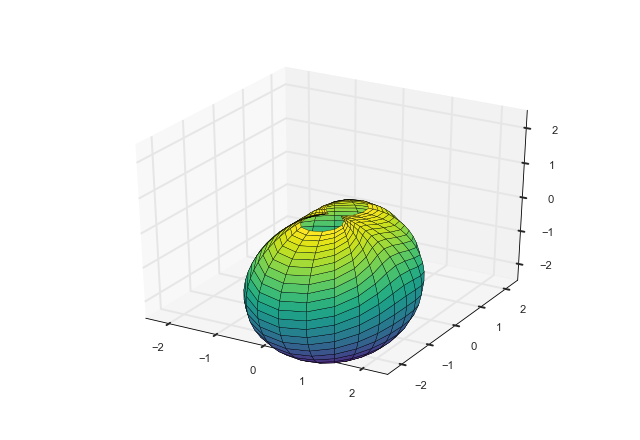

(-2.4, 2.4)

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(own_antenna.directivity_up[0].real,
                own_antenna.directivity_up[1].real,
                own_antenna.directivity_up[2].real,
                rstride=1, cstride=1, cmap=plt.cm.YlGnBu_r)

ax.plot_surface(own_antenna.directivity_down[0].real,
                own_antenna.directivity_down[1].real,
                own_antenna.directivity_down[2].real,
                rstride=1, cstride=1, cmap='viridis')

dist = 4
ax.set_xlim([-dist*.6,dist*.6])
ax.set_ylim([-dist*.6,dist*.6])
ax.set_zlim([-dist*.6,dist*.6])

In [12]:
own_antenna.directivity_up.shape

(3, 25, 25)

<IPython.core.display.Javascript object>


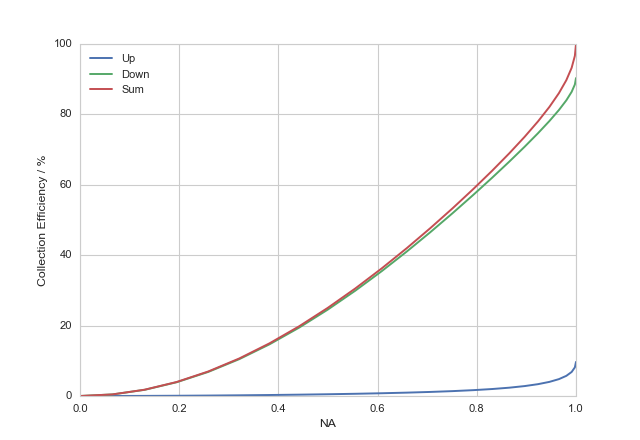

In [13]:
plt.figure()
powerUp = own_antenna.ffp_up/own_antenna.ffp*100
powerDown = own_antenna.ffp_down/own_antenna.ffp*100
plt.plot(own_antenna.NA_up,powerUp,label='Up')
plt.plot(own_antenna.NA_down,powerDown,label='Down')
plt.plot(own_antenna.NA_up,powerUp+list(reversed(powerDown)),label='Sum')
plt.xlabel('NA')
plt.ylabel('Collection Efficiency / %')
plt.legend(loc='best');

In [14]:
arr_ = np.array([1,2,3])
print np.linalg.norm(arr_,axis=0)
print np.sqrt(np.sum(arr_**2,axis=0))

3.74165738677
3.74165738677


In [15]:
own_antenna.NA_up

array([ 0.        ,  0.06533056,  0.13038199,  0.19487634,  0.25853806,
        0.32109513,  0.38228028,  0.44183208,  0.49949608,  0.55502592,
        0.60818433,  0.65874418,  0.70648944,  0.75121613,  0.79273314,
        0.83086308,  0.86544304,  0.89632527,  0.92337781,  0.94648509,
        0.96554837,  0.9804862 ,  0.99123477,  0.99774813,  0.99999848])